Plan: 
- data exploration 
- preprocessing
    - data typing
    - Scaling
    - Drop columns if needed 
    - smth else
    - --> create python pipeline for running it fast
- Dimension reductions + clustering  - different methods
    - PCA ? MCA? Check something else
    - unsupervised methods such as KNN, etc.
    - https://stats.stackexchange.com/questions/99171/why-is-euclidean-distance-not-a-good-metric-in-high-dimensions/
- trying to create characteristic labeles
- visualize on map! Would be super interesting
- bring time series data --> how can we forecast changes in labels?
- API? --> check the readme.


#### TODO: Check where the fuck we get the updated data at work - why we only have like 2020/2021 data when downloading from stat fin.

- im confused

In [55]:
import os


import pandas as pd
import polars as pl
from pyproj import CRS, Transformer


import matplotlib.pyplot as plt
import seaborn as sns
# !pip uninstall scipy
# !pip install scipy==1.11.4
import scipy
# print(scipy.__version__)
print(dir(scipy))
from ydata_profiling import ProfileReport

import warnings
warnings.filterwarnings('ignore')   #ignore ValueWarning



sns.set_theme()
%matplotlib inline

['LowLevelCallable', '__version__', 'cluster', 'constants', 'datasets', 'fft', 'fftpack', 'integrate', 'interpolate', 'io', 'linalg', 'misc', 'ndimage', 'odr', 'optimize', 'show_config', 'signal', 'sparse', 'spatial', 'special', 'stats', 'test']


use project as opportunity to practice polars

# Data Exploration and Cleanup

In [2]:
os.getcwd()
df = pd.read_csv("data/postal_code_demographics.csv", na_values=["."])
# df = pl.from_pandas(df)
df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'data/postal_code_demographics.csv'

In [3]:
df.shape

(3026, 100)

--- 
# Extra begins

In [43]:
df = pd.read_csv("data/general_features.csv", sep=";", na_values=["."])
# df = pl.from_pandas(df)
df.head()

,Postinumeroalue,Tiedot,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,KOKO MAA,X-koordinaatti,4.293000e+05,429300,429300,429300,429300,429300,429300,429300,429300,4.293000e+05,4.293000e+05,4.293000e+05
1,KOKO MAA,Y-koordinaatti,7.084490e+06,7084490,7084490,7084490,7084490,7084490,7084490,7084490,7084490,7.084490e+06,7.084490e+06,7.084490e+06
2,KOKO MAA,Postinumeroalueen pinta-ala,3.908137e+11,390813692400,390813692400,390813692400,390813692400,390813692400,390813692400,390813692400,390813692400,3.908137e+11,3.908137e+11,3.908137e+11
3,KOKO MAA,Asukkaat yhteens� (HE),5.375276e+06,5401267,5426674,5451270,5471753,5487308,5503297,5513130,5517919,5.525292e+06,5.533793e+06,5.548241e+06
4,KOKO MAA,Miehet (HE),2.638416e+06,2652534,2666622,2680364,2691863,2701490,2712327,2719131,2723290,2.728262e+06,2.733808e+06,2.743101e+06


In [44]:
df[df["Tiedot"] == "Ty�paikat yhteens� (TP)"].head()

,Postinumeroalue,Tiedot,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
74,KOKO MAA,Ty�paikat yhteens� (TP),2325679.0,2354422,2339904,2301751,2274076,2256459,2275679,2327730,2373668,2373526.0,2284673.0,NaN
181,00100 Helsinki keskusta - Etu-T��l� (Helsinki),Ty�paikat yhteens� (TP),43524.0,44037,46945,45564,45898,46662,48470,50264,51915,51616.0,49712.0,NaN
288,00120 Punavuori - Bulevardi (Helsinki),Ty�paikat yhteens� (TP),9196.0,9493,9854,9172,8486,8515,8358,7880,7553,7203.0,7131.0,NaN
395,00130 Kaartinkaupunki (Helsinki),Ty�paikat yhteens� (TP),10960.0,12040,11413,10499,11074,10927,11138,10886,12142,11597.0,11708.0,NaN
502,00140 Kaivopuisto - Ullanlinna (Helsinki),Ty�paikat yhteens� (TP),2792.0,2660,2354,2816,2309,2282,2347,2684,2673,2532.0,1919.0,NaN


In [45]:
keep_cols = [
    "Postinumeroalue",
    "Tiedot",
    "2020",
]
df = df[keep_cols]
df.head()


,Postinumeroalue,Tiedot,2020
0,KOKO MAA,X-koordinaatti,4.293000e+05
1,KOKO MAA,Y-koordinaatti,7.084490e+06
2,KOKO MAA,Postinumeroalueen pinta-ala,3.908137e+11
3,KOKO MAA,Asukkaat yhteens� (HE),5.533793e+06
4,KOKO MAA,Miehet (HE),2.733808e+06


Note: ^check that warning when you have time for it

In [46]:
colnames_to = ["area", "feat", "value"]
df = df.rename(columns=dict(zip(keep_cols, colnames_to)))
df.head()

,area,feat,value
0,KOKO MAA,X-koordinaatti,4.293000e+05
1,KOKO MAA,Y-koordinaatti,7.084490e+06
2,KOKO MAA,Postinumeroalueen pinta-ala,3.908137e+11
3,KOKO MAA,Asukkaat yhteens� (HE),5.533793e+06
4,KOKO MAA,Miehet (HE),2.733808e+06


In [47]:
df = df[df["area"] != "KOKO MAA"]
df.head()

,area,feat,value
107,00100 Helsinki keskusta - Etu-T��l� (Helsinki),X-koordinaatti,384979.0
108,00100 Helsinki keskusta - Etu-T��l� (Helsinki),Y-koordinaatti,6672361.0
109,00100 Helsinki keskusta - Etu-T��l� (Helsinki),Postinumeroalueen pinta-ala,2353278.0
110,00100 Helsinki keskusta - Etu-T��l� (Helsinki),Asukkaat yhteens� (HE),18373.0
111,00100 Helsinki keskusta - Etu-T��l� (Helsinki),Miehet (HE),8684.0


In [48]:
df.area.unique()[:10]

array(['00100  Helsinki keskusta - Etu-T��l� (Helsinki)',
       '00120  Punavuori - Bulevardi (Helsinki)',
       '00130  Kaartinkaupunki (Helsinki)',
       '00140  Kaivopuisto - Ullanlinna (Helsinki)',
       '00150  Punavuori - Eira - Hernesaari (Helsinki)',
       '00160  Katajanokka (Helsinki)', '00170  Kruununhaka (Helsinki)',
       '00180  Kamppi - Ruoholahti (Helsinki)',
       '00190  Suomenlinna (Helsinki)',
       '00200  Pohjois-Lauttasaari (Helsinki)'], dtype=object)

In [49]:
df["pcode"] = df["area"].str.slice(0,5)
df.head()

,area,feat,value,pcode
107,00100 Helsinki keskusta - Etu-T��l� (Helsinki),X-koordinaatti,384979.0,00100
108,00100 Helsinki keskusta - Etu-T��l� (Helsinki),Y-koordinaatti,6672361.0,00100
109,00100 Helsinki keskusta - Etu-T��l� (Helsinki),Postinumeroalueen pinta-ala,2353278.0,00100
110,00100 Helsinki keskusta - Etu-T��l� (Helsinki),Asukkaat yhteens� (HE),18373.0,00100
111,00100 Helsinki keskusta - Etu-T��l� (Helsinki),Miehet (HE),8684.0,00100


In [50]:
df["municipality"] = df["area"].str.extract("(\(.*\))")[0].str.slice(1,-1)
df.head()

,area,feat,value,pcode,municipality
107,00100 Helsinki keskusta - Etu-T��l� (Helsinki),X-koordinaatti,384979.0,00100,Helsinki
108,00100 Helsinki keskusta - Etu-T��l� (Helsinki),Y-koordinaatti,6672361.0,00100,Helsinki
109,00100 Helsinki keskusta - Etu-T��l� (Helsinki),Postinumeroalueen pinta-ala,2353278.0,00100,Helsinki
110,00100 Helsinki keskusta - Etu-T��l� (Helsinki),Asukkaat yhteens� (HE),18373.0,00100,Helsinki
111,00100 Helsinki keskusta - Etu-T��l� (Helsinki),Miehet (HE),8684.0,00100,Helsinki


In [51]:
reg_key = "\d .* \("
df["pcode_name"] = df["area"].str.extract(f"({reg_key})")[0].str.slice(2, -1).str.strip()
df = df.drop(columns=["area"])
df.head()

,feat,value,pcode,municipality,pcode_name
107,X-koordinaatti,384979.0,00100,Helsinki,Helsinki keskusta - Etu-T��l�
108,Y-koordinaatti,6672361.0,00100,Helsinki,Helsinki keskusta - Etu-T��l�
109,Postinumeroalueen pinta-ala,2353278.0,00100,Helsinki,Helsinki keskusta - Etu-T��l�
110,Asukkaat yhteens� (HE),18373.0,00100,Helsinki,Helsinki keskusta - Etu-T��l�
111,Miehet (HE),8684.0,00100,Helsinki,Helsinki keskusta - Etu-T��l�


In [52]:
# TODO: CHECK HOW TO DO THIS WITH PIVOT? I dont know how to do it without internet

In [56]:

col_names = list(df["feat"].unique())
data = pd.DataFrame(columns=["pcode", "pcode_name", "municipality", *col_names])
data = pd.DataFrame(index=["pcode_name", "municipality", *col_names])

pcode = "00100"

chunk = df.loc[df["pcode"] == pcode, ["value"]]
chunk.T
series = ["Keskusta", "Helsinki", *chunk.values.reshape(-1)]
data[pcode] = series

chunk.values
data
pcode
len(series)
list(chunk.values)
chunk.values.reshape(-1)
data

,00100
pcode_name,Keskusta
municipality,Helsinki
X-koordinaatti,384979.0
Y-koordinaatti,6672361.0
Postinumeroalueen pinta-ala,2353278.0
...,...
Ty�tt�m�t (PT),1083.0
Lapset 0-14-vuotiaat (PT),1801.0
Opiskelijat (PT),1607.0
El�kel�iset (PT),3419.0


In [57]:
data = pd.DataFrame(index=["pcode_name", "municipality", *col_names])
cols = []
for (pcode, name, mun), chunk in df.groupby(["pcode", "pcode_name", "municipality"]):
    series = chunk["value"]
    data[pcode] = [name, mun, *series.values.reshape(-1)]
    

name
mun
chunk
data = data.T
data.head()

,pcode_name,municipality,X-koordinaatti,Y-koordinaatti,Postinumeroalueen pinta-ala,Asukkaat yhteens� (HE),Miehet (HE),Naiset (HE),Asukkaiden keski-ik� (HE),0-2-vuotiaat (HE),...,T Kotitalouksien toiminta ty�nantajina; kotitalouksien eriytt�m�t�n toiminta tavaroiden ja palveluiden tuottamiseksi omaan k�ytt��n (TP),U Kansainv�listen organisaatioiden ja toimielinten toiminta (TP),X Toimiala tuntematon (TP),Asukkaat yhteens� (PT),Ty�lliset (PT),Ty�tt�m�t (PT),Lapset 0-14-vuotiaat (PT),Opiskelijat (PT),El�kel�iset (PT),Muut (PT)
00100,Helsinki keskusta - Etu-T��l�,Helsinki,384979.0,6672361.0,2353278.0,18373.0,8684.0,9689.0,42.0,390.0,...,0.0,52.0,0.0,18373.0,9682.0,1083.0,1801.0,1607.0,3419.0,781.0
00120,Punavuori - Bulevardi,Helsinki,385531.0,6671434.0,414010.0,7216.0,3424.0,3792.0,41.0,143.0,...,0.0,23.0,0.0,7216.0,3736.0,460.0,830.0,564.0,1269.0,357.0
00130,Kaartinkaupunki,Helsinki,386244.0,6671474.0,428960.0,1721.0,832.0,889.0,42.0,42.0,...,0.0,101.0,0.0,1721.0,910.0,81.0,188.0,143.0,284.0,115.0
00140,Kaivopuisto - Ullanlinna,Helsinki,386394.0,6670766.0,931841.0,7995.0,3656.0,4339.0,43.0,189.0,...,0.0,172.0,0.0,7995.0,4022.0,465.0,959.0,591.0,1563.0,395.0
00150,Punavuori - Eira - Hernesaari,Helsinki,385320.0,6670373.0,1367328.0,9440.0,4352.0,5088.0,41.0,220.0,...,0.0,2.0,0.0,9440.0,5087.0,682.0,995.0,663.0,1534.0,479.0


In [58]:
data.columns[:30]

Index(['pcode_name', 'municipality', 'X-koordinaatti', 'Y-koordinaatti',
       'Postinumeroalueen pinta-ala', 'Asukkaat yhteens� (HE)', 'Miehet (HE)',
       'Naiset (HE)', 'Asukkaiden keski-ik� (HE)', '0-2-vuotiaat (HE)',
       '3-6-vuotiaat (HE)', '7-12-vuotiaat (HE)', '13-15-vuotiaat (HE)',
       '16-17-vuotiaat (HE)', '18-19-vuotiaat (HE)', '20-24-vuotiaat (HE)',
       '25-29-vuotiaat (HE)', '30-34-vuotiaat (HE)', '35-39-vuotiaat (HE)',
       '40-44-vuotiaat (HE)', '45-49-vuotiaat (HE)', '50-54-vuotiaat (HE)',
       '55-59-vuotiaat (HE)', '60-64-vuotiaat (HE)', '65-69-vuotiaat (HE)',
       '70-74-vuotiaat (HE)', '75-79-vuotiaat (HE)', '80-84-vuotiaat (HE)',
       '85 vuotta t�ytt�neet (HE)', '18 vuotta t�ytt�neet yhteens� (KO)'],
      dtype='object')

Drop coordinates (`X-koordinaatti`, `Y-koordinaatti`) and surface area of pcode (pinta-ala) --> we dont want to profile areas based on geographical proximity --> want other implicit features. If we want to visualize the map we will just use polygons.

In [105]:
data = data.drop(columns=["X-koordinaatti", "Y-koordinaatti", "Postinumeroalueen pinta-ala"])
data.head()

,pcode_name,municipality,Asukkaat yhteens� (HE),Miehet (HE),Naiset (HE),Asukkaiden keski-ik� (HE),0-2-vuotiaat (HE),3-6-vuotiaat (HE),7-12-vuotiaat (HE),13-15-vuotiaat (HE),...,T Kotitalouksien toiminta ty�nantajina; kotitalouksien eriytt�m�t�n toiminta tavaroiden ja palveluiden tuottamiseksi omaan k�ytt��n (TP),U Kansainv�listen organisaatioiden ja toimielinten toiminta (TP),X Toimiala tuntematon (TP),Asukkaat yhteens� (PT),Ty�lliset (PT),Ty�tt�m�t (PT),Lapset 0-14-vuotiaat (PT),Opiskelijat (PT),El�kel�iset (PT),Muut (PT)
00100,Helsinki keskusta - Etu-T��l�,Helsinki,18373.0,8684.0,9689.0,42.0,390.0,466.0,709.0,348.0,...,0.0,52.0,0.0,18373.0,9682.0,1083.0,1801.0,1607.0,3419.0,781.0
00120,Punavuori - Bulevardi,Helsinki,7216.0,3424.0,3792.0,41.0,143.0,217.0,352.0,176.0,...,0.0,23.0,0.0,7216.0,3736.0,460.0,830.0,564.0,1269.0,357.0
00130,Kaartinkaupunki,Helsinki,1721.0,832.0,889.0,42.0,42.0,39.0,81.0,32.0,...,0.0,101.0,0.0,1721.0,910.0,81.0,188.0,143.0,284.0,115.0
00140,Kaivopuisto - Ullanlinna,Helsinki,7995.0,3656.0,4339.0,43.0,189.0,263.0,387.0,178.0,...,0.0,172.0,0.0,7995.0,4022.0,465.0,959.0,591.0,1563.0,395.0
00150,Punavuori - Eira - Hernesaari,Helsinki,9440.0,4352.0,5088.0,41.0,220.0,261.0,414.0,136.0,...,0.0,2.0,0.0,9440.0,5087.0,682.0,995.0,663.0,1534.0,479.0


In [106]:
data.municipality.unique()

array(['Helsinki', 'Sipoo', 'Vantaa', 'Nurmij�rvi', 'Espoo',
       'Kirkkonummi', 'Siuntio', 'Kauniainen'], dtype=object)

In [107]:
data.columns[30:60]

Index(['Ammatillisen tutkinnon suorittaneet (KO)',
       'Alemman korkeakoulututkinnon suorittaneet (KO)',
       'Ylemm�n korkeakoulututkinnon suorittaneet (KO)',
       '18 vuotta t�ytt�neet yhteens� (HR)', 'Asukkaiden keskitulot (HR)',
       'Asukkaiden mediaanitulot (HR)',
       'Alimpaan tuloluokkaan kuuluvat asukkaat (HR)',
       'Keskimm�iseen tuloluokkaan kuuluvat asukkaat (HR)',
       'Ylimp��n tuloluokkaan kuuluvat asukkaat (HR)',
       'Asukkaiden ostovoimakertym� (HR)', 'Taloudet yhteens� (TE)',
       'Talouksien keskikoko (TE)', 'Asumisv�ljyys (TE)',
       'Yksinasuvien taloudet (TE)', 'Nuorten yksinasuvien taloudet (TE)',
       'Lapsettomat nuorten parien taloudet (TE)', 'Lapsitaloudet (TE)',
       'Pienten lasten taloudet (TE)',
       'Alle kouluik�isten lasten taloudet (TE)',
       'Kouluik�isten lasten taloudet (TE)',
       'Teini-ik�isten lasten taloudet (TE)',
       'Yhden vanhemman lapsitaloudet (TE)', 'Aikuisten taloudet (TE)',
       'El�kel�isten ta

Lets start collecting a translation mapping for columns and check if we should disregard some. FUCK that! let ChatGPT Figure that out.



In [108]:
# translation_mapping = {
#     "Asukkaat yhteens� (HE)": "population",
#     "Miehet (HE)": "population_men",
#     "Naiset (HE)	Asukkaiden keski-ik� (HE)": "population_women",
#     "mean_age",

# }
data.dtypes

pcode_name                    object
municipality                  object
Asukkaat yhteens� (HE)       Float64
Miehet (HE)                  Float64
Naiset (HE)                  Float64
                              ...   
Ty�tt�m�t (PT)               Float64
Lapset 0-14-vuotiaat (PT)    Float64
Opiskelijat (PT)             Float64
El�kel�iset (PT)             Float64
Muut (PT)                    Float64
Length: 106, dtype: object

I know that the values should be either floats or ints, so lests first cast them all to floats

In [109]:
data

,pcode_name,municipality,Asukkaat yhteens� (HE),Miehet (HE),Naiset (HE),Asukkaiden keski-ik� (HE),0-2-vuotiaat (HE),3-6-vuotiaat (HE),7-12-vuotiaat (HE),13-15-vuotiaat (HE),...,T Kotitalouksien toiminta ty�nantajina; kotitalouksien eriytt�m�t�n toiminta tavaroiden ja palveluiden tuottamiseksi omaan k�ytt��n (TP),U Kansainv�listen organisaatioiden ja toimielinten toiminta (TP),X Toimiala tuntematon (TP),Asukkaat yhteens� (PT),Ty�lliset (PT),Ty�tt�m�t (PT),Lapset 0-14-vuotiaat (PT),Opiskelijat (PT),El�kel�iset (PT),Muut (PT)
00100,Helsinki keskusta - Etu-T��l�,Helsinki,18373.0,8684.0,9689.0,42.0,390.0,466.0,709.0,348.0,...,0.0,52.0,0.0,18373.0,9682.0,1083.0,1801.0,1607.0,3419.0,781.0
00120,Punavuori - Bulevardi,Helsinki,7216.0,3424.0,3792.0,41.0,143.0,217.0,352.0,176.0,...,0.0,23.0,0.0,7216.0,3736.0,460.0,830.0,564.0,1269.0,357.0
00130,Kaartinkaupunki,Helsinki,1721.0,832.0,889.0,42.0,42.0,39.0,81.0,32.0,...,0.0,101.0,0.0,1721.0,910.0,81.0,188.0,143.0,284.0,115.0
00140,Kaivopuisto - Ullanlinna,Helsinki,7995.0,3656.0,4339.0,43.0,189.0,263.0,387.0,178.0,...,0.0,172.0,0.0,7995.0,4022.0,465.0,959.0,591.0,1563.0,395.0
00150,Punavuori - Eira - Hernesaari,Helsinki,9440.0,4352.0,5088.0,41.0,220.0,261.0,414.0,136.0,...,0.0,2.0,0.0,9440.0,5087.0,682.0,995.0,663.0,1534.0,479.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
02740,Bemb�le-Pakankyl�,Espoo,3210.0,1577.0,1633.0,36.0,125.0,197.0,282.0,171.0,...,0.0,0.0,0.0,3210.0,1596.0,167.0,705.0,295.0,324.0,123.0
02750,Sep�nkyl�-Kuurinniitty,Espoo,6572.0,3314.0,3258.0,35.0,250.0,375.0,659.0,325.0,...,0.0,0.0,0.0,6572.0,3144.0,438.0,1513.0,585.0,660.0,232.0
02760,Tuomarila-Suvela,Espoo,14149.0,7027.0,7122.0,37.0,596.0,812.0,1114.0,505.0,...,0.0,0.0,0.0,14149.0,6304.0,1065.0,2873.0,1180.0,2031.0,696.0
02770,Espoon Keskus,Espoo,10920.0,5494.0,5426.0,38.0,367.0,542.0,828.0,357.0,...,0.0,0.0,0.0,10920.0,4583.0,867.0,1981.0,1144.0,1770.0,575.0


In [110]:
not_str = data.columns[~data.columns.isin(["pcode_name", "municipality"])]
not_str
data[not_str] = data[not_str].astype("Float64")
data

,pcode_name,municipality,Asukkaat yhteens� (HE),Miehet (HE),Naiset (HE),Asukkaiden keski-ik� (HE),0-2-vuotiaat (HE),3-6-vuotiaat (HE),7-12-vuotiaat (HE),13-15-vuotiaat (HE),...,T Kotitalouksien toiminta ty�nantajina; kotitalouksien eriytt�m�t�n toiminta tavaroiden ja palveluiden tuottamiseksi omaan k�ytt��n (TP),U Kansainv�listen organisaatioiden ja toimielinten toiminta (TP),X Toimiala tuntematon (TP),Asukkaat yhteens� (PT),Ty�lliset (PT),Ty�tt�m�t (PT),Lapset 0-14-vuotiaat (PT),Opiskelijat (PT),El�kel�iset (PT),Muut (PT)
00100,Helsinki keskusta - Etu-T��l�,Helsinki,18373.0,8684.0,9689.0,42.0,390.0,466.0,709.0,348.0,...,0.0,52.0,0.0,18373.0,9682.0,1083.0,1801.0,1607.0,3419.0,781.0
00120,Punavuori - Bulevardi,Helsinki,7216.0,3424.0,3792.0,41.0,143.0,217.0,352.0,176.0,...,0.0,23.0,0.0,7216.0,3736.0,460.0,830.0,564.0,1269.0,357.0
00130,Kaartinkaupunki,Helsinki,1721.0,832.0,889.0,42.0,42.0,39.0,81.0,32.0,...,0.0,101.0,0.0,1721.0,910.0,81.0,188.0,143.0,284.0,115.0
00140,Kaivopuisto - Ullanlinna,Helsinki,7995.0,3656.0,4339.0,43.0,189.0,263.0,387.0,178.0,...,0.0,172.0,0.0,7995.0,4022.0,465.0,959.0,591.0,1563.0,395.0
00150,Punavuori - Eira - Hernesaari,Helsinki,9440.0,4352.0,5088.0,41.0,220.0,261.0,414.0,136.0,...,0.0,2.0,0.0,9440.0,5087.0,682.0,995.0,663.0,1534.0,479.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
02740,Bemb�le-Pakankyl�,Espoo,3210.0,1577.0,1633.0,36.0,125.0,197.0,282.0,171.0,...,0.0,0.0,0.0,3210.0,1596.0,167.0,705.0,295.0,324.0,123.0
02750,Sep�nkyl�-Kuurinniitty,Espoo,6572.0,3314.0,3258.0,35.0,250.0,375.0,659.0,325.0,...,0.0,0.0,0.0,6572.0,3144.0,438.0,1513.0,585.0,660.0,232.0
02760,Tuomarila-Suvela,Espoo,14149.0,7027.0,7122.0,37.0,596.0,812.0,1114.0,505.0,...,0.0,0.0,0.0,14149.0,6304.0,1065.0,2873.0,1180.0,2031.0,696.0
02770,Espoon Keskus,Espoo,10920.0,5494.0,5426.0,38.0,367.0,542.0,828.0,357.0,...,0.0,0.0,0.0,10920.0,4583.0,867.0,1981.0,1144.0,1770.0,575.0


Profile report allows for easy first-glance evaluation of the characteristics of the dataset that we want to use. It outputs an html profile report that we can easily explore and use to plan our preprocessing steps.

In [133]:
# Create profile report of data. insepct it 
profile = ProfileReport(data, title="Profiling Report")
profile.to_file("data/profile_report_raw.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [140]:
data.columns[data.columns.str.contains("(TP)")]

Index(['Ty�paikat yhteens� (TP)', 'Alkutuotannon ty�paikat (TP)',
       'Jalostuksen ty�paikat (TP)', 'Palveluiden ty�paikat (TP)',
       'A Maatalous, mets�talous ja kalatalous (TP)',
       'B Kaivostoiminta ja louhinta (TP)', 'C Teollisuus (TP)',
       'D S�hk�-, kaasu- ja l�mp�huolto, j��hdytysliiketoiminta (TP)',
       'E Vesihuolto, viem�ri- ja j�tevesihuolto ja muu ymp�rist�n puhtaanapito (TP)',
       'F Rakentaminen (TP)',
       'G Tukku- ja v�hitt�iskauppa; moottoriajoneuvojen ja moottoripy�rien korjaus (TP)',
       'H Kuljetus ja varastointi (TP)',
       'I Majoitus- ja ravitsemistoiminta (TP)',
       'J Informaatio ja viestint� (TP)',
       'K Rahoitus- ja vakuutustoiminta (TP)',
       'L Kiinteist�alan toiminta (TP)',
       'M Ammatillinen, tieteellinen ja tekninen toiminta (TP)',
       'N Hallinto- ja tukipalvelutoiminta (TP)',
       'O Julkinen hallinto ja maanpuolustus; pakollinen sosiaalivakuutus (TP)',
       'P Koulutus (TP)', 'Q Terveys- ja sosiaalipalv

### Cleaning plan

#### Column names

- translate (with ChatGPT)
- at end, take all the (..) away as well

#### Age
- partitiond into age groups --> should be normalized by population *within* the pcode
- Keep all cols?
- Drop:
    -  `"18 vuotta t�ytt�neet yhteens� (KO)"`
    -  `"18 vuotta t�ytt�neet yhteens� (HR)"`
    -  --> is overlapping with partitions


#### Education

- also normalize by total population 
- `Koulutetut yhteens� (KO)` --> check docs, what does this mean?

#### Finances
- Drop
    -  `"Asukkaiden keskitulot (HR)"`
        -  --> we already have median income, lets keep it as a more robust measure
    - All `(TR)` columns
        - --> (Check the docs first, whats the difference, but) are duplicate columns that TE already above --> we dont need both
        - One describes indivudals, while the other is more about dwelling communities --> I am more interested in home the individuals are shown in the data.
- Check what ostovoimakertymä means --> could it be overlapping with median income? Is it needed?



#### Zeroes/null handling

Seems that anyways theres always the same three numbers of random zeros --> could be valuable to check whats up with that and delete them.

- Replace zeros with nulls --> it is not possible, e.g. that no-one lives in this area
    - `Asukkaat yhteens� (HE)`
    - `Miehet (HE)`
    - `Naiset (HE)`
    - `Asukkaiden keski-ik� (HE)`
    - ``
    - ``
    - ``


#### Housing

- Obviously all normalized by population

- `Taloudet yhteens� (XX)` is not relevant --> is so dependent on population and size, could probably just be deleted.
    - The number of houses in the area is not interesting in itself, more about the structure of the housing.
    - Same with `Rakennukset yhteens� (RA)`
    - `Muut rakennukset yhteens� (RA)`
    - `Asuinrakennukset yhteens� (RA)`
    - `Asunnot (RA)`
    - `Muut asunnot (RA)` (doesnt tell me anything)

- Maybe use just some of the age group housing partitions? Do i really need all of those?
    - E.g instead of the different "lapsitaloudet", we could just use `Lapsitaloudet (TE)` and delete
        - `Pienten lasten taloudet (TE)`
        - `Alle kouluik�isten lasten taloudet (TE)`
        - `Kouluik�isten lasten taloudet (TE)`
        - `Teini-ik�isten lasten taloudet (TE)`
    - They kind of describe the same thing anyways
    - Also think if you could delete opiskelijoiden/eläkeläisten taloudet, because you actually have your own columns for that anyways


#### (TP) columns: why were they all rejected?? Where is the data?

- lets anyways do a bit of manual clustering of the groups --> 20+ industries into 2-3
- Actually, take the three sectors,
    - `Ty�paikat yhteens� (TP)`
    - `Alkutuotannon ty�paikat (TP)`
    - `Jalostuksen ty�paikat (TP)`
    - `Palveluiden ty�paikat (TP)`
Also delete extra columns:
    - `Asukkaat yhteens� (PT)`
    - `Ty�lliset (PT)`
    - `Lapset 0-14-vuotiaat (PT)`
    - `Muut (PT)`
    <!-- - `El�kel�iset (PT)` -->
    <!-- - `El�kel�iset (PT)` -->






### ACTUALLY; I THINK YOU SHOULD TRY TO DO THE ANALYSIS ON TWO TYPES, UNNORMALIZED DATA AND DATA NORMALIZED BY POPULATION

what do the two different features tell you? 
- if you bring non population stuff into the equation, you bring in information of what is like for an *individual*, but if you dont normalize, and include population, you favor clustering populous areas together (maybe not so smart after all?).

In [153]:
df[df.feat.str.contains("(TP)")]

,feat,value,pcode,municipality,pcode_name
181,Ty�paikat yhteens� (TP),.,00100,Helsinki,Helsinki keskusta - Etu-T��l�
182,Alkutuotannon ty�paikat (TP),.,00100,Helsinki,Helsinki keskusta - Etu-T��l�
183,Jalostuksen ty�paikat (TP),.,00100,Helsinki,Helsinki keskusta - Etu-T��l�
184,Palveluiden ty�paikat (TP),.,00100,Helsinki,Helsinki keskusta - Etu-T��l�
185,"A Maatalous, mets�talous ja kalatalous (TP)",.,00100,Helsinki,Helsinki keskusta - Etu-T��l�
...,...,...,...,...,...
20532,"R Taiteet, viihde ja virkistys (TP)",.,02780,Espoo,Kauklahti
20533,S Muu palvelutoiminta (TP),.,02780,Espoo,Kauklahti
20534,T Kotitalouksien toiminta ty�nantajina; kotita...,.,02780,Espoo,Kauklahti
20535,U Kansainv�listen organisaatioiden ja toimieli...,.,02780,Espoo,Kauklahti


In [9]:
# drop = ["Year"]
# df = df.drop(drop)
# df.head()

In [5]:
# TODO: convert int cols to int
# Split postcode cols

In [7]:
# Create profile report of data. insepct it 
profile = ProfileReport(df.to_pandas(), title="Profiling Report")
profile.to_file("data/profile_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [21]:
data

,pcode_name,municipality,Asukkaat yhteens� (HE),Miehet (HE),Naiset (HE),Asukkaiden keski-ik� (HE),0-2-vuotiaat (HE),3-6-vuotiaat (HE),7-12-vuotiaat (HE),13-15-vuotiaat (HE),...,T Kotitalouksien toiminta ty�nantajina; kotitalouksien eriytt�m�t�n toiminta tavaroiden ja palveluiden tuottamiseksi omaan k�ytt��n (TP),U Kansainv�listen organisaatioiden ja toimielinten toiminta (TP),X Toimiala tuntematon (TP),Asukkaat yhteens� (PT),Ty�lliset (PT),Ty�tt�m�t (PT),Lapset 0-14-vuotiaat (PT),Opiskelijat (PT),El�kel�iset (PT),Muut (PT)
00100,Helsinki keskusta - Etu-T��l�,Helsinki,17893,8422,9471,42,364,400,716,359,...,.,.,.,17893,9748,723,1729,1542,3387,764
00120,Punavuori - Bulevardi,Helsinki,7230,3390,3840,41,158,197,351,179,...,.,.,.,7230,3935,310,828,562,1242,353
00130,Kaartinkaupunki,Helsinki,1716,843,873,42,42,37,87,49,...,.,.,.,1716,936,49,200,138,286,107
00140,Kaivopuisto - Ullanlinna,Helsinki,7845,3591,4254,43,177,273,365,175,...,.,.,.,7845,4066,297,939,557,1564,422
00150,Punavuori - Eira - Hernesaari,Helsinki,9368,4313,5055,41,192,241,412,162,...,.,.,.,9368,5253,465,961,645,1548,496
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
02740,Bemb�le-Pakankyl�,Espoo,3179,1601,1578,37,109,181,272,153,...,.,.,.,3179,1639,130,663,293,330,124
02750,Sep�nkyl�-Kuurinniitty,Espoo,6720,3372,3348,35,257,370,653,329,...,.,.,.,6720,3339,305,1497,635,690,254
02760,Tuomarila-Suvela,Espoo,13947,6912,7035,37,583,802,1113,517,...,.,.,.,13947,6437,822,2856,1123,1995,714
02770,Espoon Keskus,Espoo,10808,5442,5366,39,347,518,836,398,...,.,.,.,10808,4661,755,1971,1043,1812,566


In [ ]:
normalize_by_pop = [
    "Miehet (HE)",
    "Naiset (HE)",
    '0-2-vuotiaat (HE)',
       '3-6-vuotiaat (HE)', '7-12-vuotiaat (HE)', '13-15-vuotiaat (HE)',
       '16-17-vuotiaat (HE)', '18-19-vuotiaat (HE)', '20-24-vuotiaat (HE)',
       '25-29-vuotiaat (HE)', '30-34-vuotiaat (HE)', '35-39-vuotiaat (HE)',
       '40-44-vuotiaat (HE)', '45-49-vuotiaat (HE)', '50-54-vuotiaat (HE)',
       '55-59-vuotiaat (HE)', '60-64-vuotiaat (HE)', '65-69-vuotiaat (HE)',
       '70-74-vuotiaat (HE)', '75-79-vuotiaat (HE)', '80-84-vuotiaat (HE)',
       '85 vuotta t�ytt�neet (HE)', '18 vuotta t�ytt�neet yhteens� (KO)',
       'Perusasteen suorittaneet (KO)', 'Koulutetut yhteens� (KO)',
       'Ylioppilastutkinnon suorittaneet (KO)',
       'Ammatillisen tutkinnon suorittaneet (KO)',
       'Alemman korkeakoulututkinnon suorittaneet (KO)'
]

In [124]:
norm_skip = [
    'pcode_name', 'municipality', 'Asukkaat yhteens� (HE)', 'Asukkaiden ostovoimakertym� (HR)',  'Asukkaiden mediaanitulot (HR)',
    'Talouksien keskikoko (TE)', 'Asumisv�ljyys (TE)',
]
data.head()
data.columns[:45]
data_pca = data.iloc[:, :45]

norm_columns = data_pca.columns[~data_pca.columns.isin(norm_skip)]

# data_pca[norm_columns] = data_pca[norm_columns].apply(func=lambda x: x / data_pca["Asukkaat yhteens� (HE)"] ,axis=1)  #/ data_pca["Asukkaat yhteens� (HE)"]


for col in norm_columns:
    print(col)
    data[col] /= data_pca["Asukkaat yhteens� (HE)"]
data_pca[norm_columns].shape
data_pca["Asukkaat yhteens� (HE)"].shape
data_pca

Miehet (HE)
Naiset (HE)
Asukkaiden keski-ik� (HE)
0-2-vuotiaat (HE)
3-6-vuotiaat (HE)
7-12-vuotiaat (HE)
13-15-vuotiaat (HE)
16-17-vuotiaat (HE)
18-19-vuotiaat (HE)
20-24-vuotiaat (HE)
25-29-vuotiaat (HE)
30-34-vuotiaat (HE)
35-39-vuotiaat (HE)
40-44-vuotiaat (HE)
45-49-vuotiaat (HE)
50-54-vuotiaat (HE)
55-59-vuotiaat (HE)
60-64-vuotiaat (HE)
65-69-vuotiaat (HE)
70-74-vuotiaat (HE)
75-79-vuotiaat (HE)
80-84-vuotiaat (HE)
85 vuotta t�ytt�neet (HE)
18 vuotta t�ytt�neet yhteens� (KO)
Perusasteen suorittaneet (KO)
Koulutetut yhteens� (KO)
Ylioppilastutkinnon suorittaneet (KO)
Ammatillisen tutkinnon suorittaneet (KO)
Alemman korkeakoulututkinnon suorittaneet (KO)
Ylemm�n korkeakoulututkinnon suorittaneet (KO)
18 vuotta t�ytt�neet yhteens� (HR)
Asukkaiden keskitulot (HR)
Alimpaan tuloluokkaan kuuluvat asukkaat (HR)
Keskimm�iseen tuloluokkaan kuuluvat asukkaat (HR)
Ylimp��n tuloluokkaan kuuluvat asukkaat (HR)
Taloudet yhteens� (TE)
Yksinasuvien taloudet (TE)
Nuorten yksinasuvien taloudet (TE)

,pcode_name,municipality,Asukkaat yhteens� (HE),Miehet (HE),Naiset (HE),Asukkaiden keski-ik� (HE),0-2-vuotiaat (HE),3-6-vuotiaat (HE),7-12-vuotiaat (HE),13-15-vuotiaat (HE),...,Asukkaiden mediaanitulot (HR),Alimpaan tuloluokkaan kuuluvat asukkaat (HR),Keskimm�iseen tuloluokkaan kuuluvat asukkaat (HR),Ylimp��n tuloluokkaan kuuluvat asukkaat (HR),Asukkaiden ostovoimakertym� (HR),Taloudet yhteens� (TE),Talouksien keskikoko (TE),Asumisv�ljyys (TE),Yksinasuvien taloudet (TE),Nuorten yksinasuvien taloudet (TE)
00100,Helsinki keskusta - Etu-T��l�,Helsinki,18373.0,0.47265,0.52735,0.002286,0.021227,0.025363,0.038589,0.018941,...,29258.0,0.158602,0.357699,0.367387,732469677.0,0.564959,1.7,39.0,0.292767,0.121156
00120,Punavuori - Bulevardi,Helsinki,7216.0,0.474501,0.525499,0.005682,0.019817,0.030072,0.04878,0.02439,...,29684.0,0.152162,0.338692,0.371258,301732169.0,0.560837,1.8,39.4,0.282982,0.11031
00130,Kaartinkaupunki,Helsinki,1721.0,0.48344,0.51656,0.024404,0.024404,0.022661,0.047066,0.018594,...,31558.0,0.183614,0.277164,0.411389,96196739.0,0.550843,1.8,44.4,0.258571,0.09355
00140,Kaivopuisto - Ullanlinna,Helsinki,7995.0,0.457286,0.542714,0.005378,0.02364,0.032896,0.048405,0.022264,...,31333.0,0.149719,0.315447,0.394371,412551855.0,0.562477,1.8,41.8,0.283052,0.096685
00150,Punavuori - Eira - Hernesaari,Helsinki,9440.0,0.461017,0.538983,0.004343,0.023305,0.027648,0.043856,0.014407,...,27997.0,0.157309,0.381886,0.342373,345635422.0,0.614195,1.6,34.5,0.362712,0.158157
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
02740,Bemb�le-Pakankyl�,Espoo,3210.0,0.491277,0.508723,0.011215,0.038941,0.061371,0.08785,0.053271,...,27855.0,0.127103,0.347664,0.250779,76594743.0,0.400935,2.5,37.4,0.113396,0.025545
02750,Sep�nkyl�-Kuurinniitty,Espoo,6572.0,0.50426,0.49574,0.005326,0.03804,0.05706,0.100274,0.049452,...,29566.0,0.107425,0.320298,0.297322,171675959.0,0.419811,2.4,35.7,0.142118,0.052648
02760,Tuomarila-Suvela,Espoo,14149.0,0.496643,0.503357,0.002615,0.042123,0.057389,0.078733,0.035692,...,24856.0,0.14319,0.424694,0.19754,289458701.0,0.455792,2.2,32.3,0.179094,0.041275
02770,Espoon Keskus,Espoo,10920.0,0.503114,0.496886,0.00348,0.033608,0.049634,0.075824,0.032692,...,23267.0,0.172802,0.42793,0.185989,224165129.0,0.482234,2.1,33.4,0.213004,0.067125


In [22]:

# # Define the UTM coordinate system (UTM Zone 33N)
# # utm_crs = Proj('epsg:32633')  # UTM Zone 33N
# crs_input = CRS.from_epsg(3067)

# # Define the WGS84 coordinate system
# wgs84_crs = CRS.from_epsg(4326)  # WGS84

# # Provided coordinates
# x, y = 384979,	6672361

# # Convert UTM coordinates to WGS84
# transformer = Transformer.from_crs(crs_input, wgs84_crs)
# latitude, longitude = transformer.transform(x, y)

# # Print the converted coordinates
# print(f'Latitude: {latitude}, Longitude: {longitude}')

NOTE: I would really like to visualize the map on plotly, i think it would be really cool to be able to click and see various information on the map.

## PCA

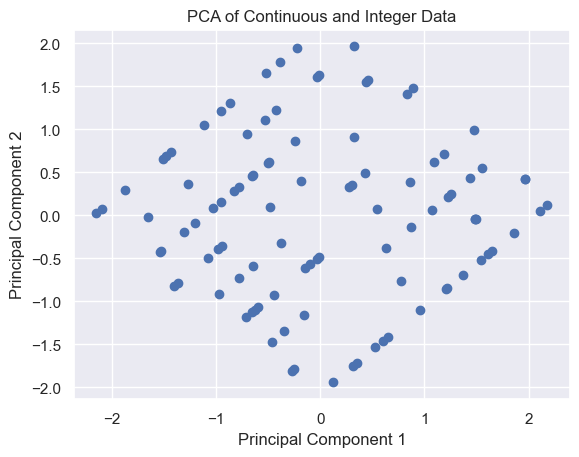

In [24]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Generate synthetic data with both continuous and integer features
np.random.seed(42)
data_test = pd.DataFrame({
    'continuous_feature': np.random.rand(100),
    'integer_feature': np.random.randint(1, 10, size=100)
})

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_test)

# Apply PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

# Visualize the results
import matplotlib.pyplot as plt

plt.scatter(pca_result[:, 0], pca_result[:, 1])
plt.title('PCA of Continuous and Integer Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


In [75]:
df

,feat,value,pcode,municipality,pcode_name
107,X-koordinaatti,384979.0,00100,Helsinki,Helsinki keskusta - Etu-T��l�
108,Y-koordinaatti,6672361.0,00100,Helsinki,Helsinki keskusta - Etu-T��l�
109,Postinumeroalueen pinta-ala,2353278.0,00100,Helsinki,Helsinki keskusta - Etu-T��l�
110,Asukkaat yhteens� (HE),18373.0,00100,Helsinki,Helsinki keskusta - Etu-T��l�
111,Miehet (HE),8684.0,00100,Helsinki,Helsinki keskusta - Etu-T��l�
...,...,...,...,...,...
20539,Ty�tt�m�t (PT),665.0,02780,Espoo,Kauklahti
20540,Lapset 0-14-vuotiaat (PT),3104.0,02780,Espoo,Kauklahti
20541,Opiskelijat (PT),1016.0,02780,Espoo,Kauklahti
20542,El�kel�iset (PT),1314.0,02780,Espoo,Kauklahti


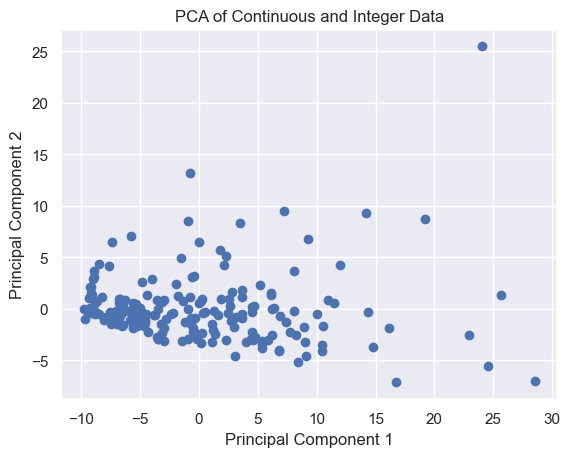

In [88]:
# TODO: DO with sklearn pipeline
df_pca = data.drop(columns=["pcode_name", "municipality", "X-koordinaatti", 'Asukkaat yhteens� (HE)'])

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_pca)

# Apply PCA
pca = PCA(n_components=10)
pca_result = pca.fit_transform(scaled_data)

plt.scatter(pca_result[:, 0], pca_result[:, 1])
plt.title('PCA of Continuous and Integer Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [82]:
pca_result[:,0]

array([ 2.39907899e+01,  2.15072017e+00, -5.71505899e+00,  2.79876166e+00,
        5.15529252e+00, -1.79383716e+00,  2.31213556e+00,  1.42044586e+01,
       -8.61916173e+00,  1.43742111e+01,  3.62799732e+00,  2.56257363e+00,
       -8.84919044e+00,  2.23397706e-02,  8.09934183e+00, -5.54656985e-01,
        1.86373548e+00, -4.83663860e+00, -8.46244928e+00, -1.30614482e+00,
       -8.23970769e+00,  6.16725439e+00,  4.54678989e+00, -7.49236646e+00,
        4.51436478e+00, -6.78267845e+00,  5.02916267e-02, -9.42746596e-01,
        2.49945321e-01,  4.71047888e+00,  3.69059895e+00,  1.05561743e+01,
        1.37746494e+00, -1.96139586e+00,  9.29060279e+00,  7.24983652e+00,
        3.52505247e+00,  1.91795655e+01, -2.95822667e+00,  3.63167178e+00,
        1.09374122e+01, -3.48926938e+00, -1.50577382e+00, -5.01399684e+00,
       -3.52498781e+00,  2.69087595e+00, -4.00668184e+00,  3.17237587e+00,
        3.02508192e+00, -3.78092166e+00, -1.57150038e-01, -1.42053532e+00,
       -4.57646326e+00, -

## ICA

/Users/rasmussiljander/mambaforge/lib/python3.10/site-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(


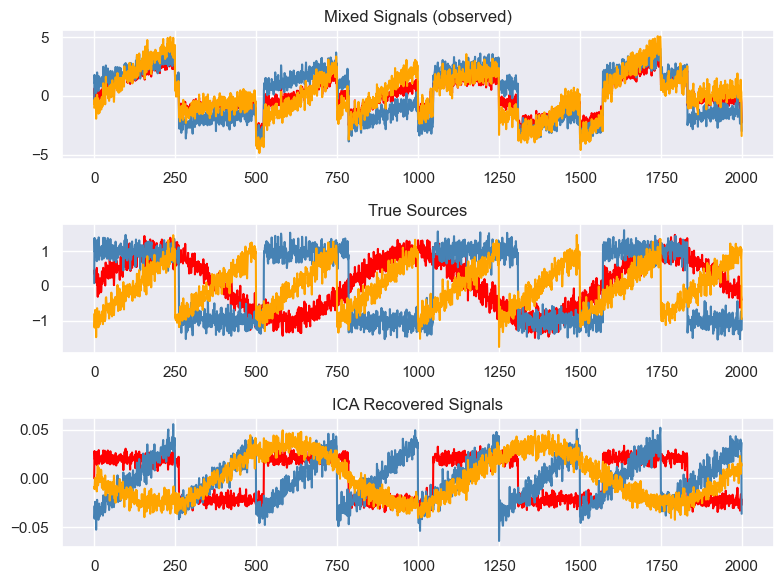

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import FastICA
from scipy import signal

# Generate synthetic data
np.random.seed(0)
n_samples = 2000
time = np.linspace(0, 8, n_samples)

s1 = np.sin(2 * time)           # Signal 1: Sinusoidal signal
s2 = np.sign(np.sin(3 * time))  # Signal 2: Square wave signal
s3 = signal.sawtooth(2 * np.pi * time)  # Signal 3: Sawtooth signal

S = np.c_[s1, s2, s3]
S += 0.2 * np.random.normal(size=S.shape)  # Add noise

# Mix the signals
A = np.array([[1, 1, 1], [0.5, 2, 1], [1.5, 1, 2]])  # Mixing matrix
X = S.dot(A.T)  # Mixed signals

# Apply ICA
ica = FastICA(n_components=3)
S_ = ica.fit_transform(X)

# Visualize the results
plt.figure(figsize=(8, 6))

models = [X, S, S_]
names = ['Mixed Signals (observed)', 'True Sources', 'ICA Recovered Signals']
colors = ['red', 'steelblue', 'orange']

for i, (model, name) in enumerate(zip(models, names), 1):
    plt.subplot(3, 1, i)
    plt.title(name)
    for sig, color in zip(model.T, colors):
        plt.plot(sig, color=color)

plt.tight_layout()
plt.show()


Sure, let's delve into a closer description of Principal Component Analysis (PCA) and Independent Component Analysis (ICA):
Principal Component Analysis (PCA):

    Basis and Working Principle:
        Basis: PCA is based on linear transformation and orthogonal transformation of data to convert it into a new coordinate system where the data's variance is maximized.
        Working Principle: PCA identifies the principal components (new axes) along which the data varies the most. The first principal component explains the maximum variance, the second principal component (uncorrelated with the first) explains the second-highest variance, and so on.

    Requirements:
        Linearity: PCA assumes that the relationships between variables are linear.
        Orthogonality: Principal components are orthogonal, meaning they are uncorrelated.

    Differences:
        Objective: PCA aims to maximize variance and capture as much information as possible in a reduced-dimensional space.
        Dependency: Principal components are linear combinations of the original features.

    When to Use:
        Variance Matters: When preserving variance is crucial.
        Feature Reduction: When dealing with high-dimensional data and reducing the number of features is desired.
        Decorrelation: When there is a need to decorrelate features.

    Usage:
        Data Transformation: Use PCA to transform the data into a new coordinate system.
        Dimensionality Reduction: Keep a subset of the principal components to achieve dimensionality reduction.

Independent Component Analysis (ICA):

    Basis and Working Principle:
        Basis: ICA is based on the assumption that the observed multivariate data is a linear combination of independent and non-Gaussian source signals.
        Working Principle: ICA aims to find a demixing matrix to recover the original independent sources from the observed mixed signals.

    Requirements:
        Independence: ICA assumes that the sources are statistically independent.
        Non-Gaussianity: The sources should have a non-Gaussian distribution.

    Differences:
        Objective: ICA aims to find statistically independent sources within the data.
        Independence: ICA focuses on finding features that are statistically independent rather than maximizing variance.

    When to Use:
        Source Separation: When you have mixed signals and want to separate them into their independent sources.
        Non-Gaussian Sources: When sources are non-Gaussian and have independent variations.

    Usage:
        Signal Separation: Use ICA to recover independent sources from observed mixed signals.
        Blind Source Separation: Useful in scenarios where the sources are not known.



## K - means

K-Means Clustering:

Based on:
K-Means is based on partitioning the dataset into 'K' clusters, where each data point belongs to the cluster with the nearest mean.

How it works:

    Randomly initialize K cluster centroids.
    Assign each data point to the cluster whose centroid is closest.
    Recalculate the centroids based on the assigned data points.
    Repeat steps 2-3 until convergence (minimal change in centroids).

Requirements:

    Euclidean distance metric.
    Assumes clusters are spherical and equally sized.

Differences:

    Sensitive to the initial choice of centroids.
    Works well with spherical clusters.

When to use:

    When the underlying data has well-defined clusters.
    Balanced cluster sizes.

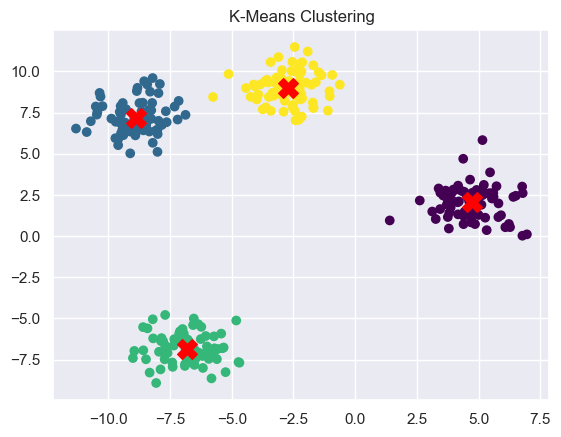

In [90]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# Generating synthetic data
X, _ = make_blobs(n_samples=300, centers=4, random_state=42)

# Applying K-Means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X)

# Visualizing the results
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='X', s=200, color='red')
plt.title('K-Means Clustering')
plt.show()


# labels = kmeans.predict(new_data_point)


In [96]:
# Applying K-Means clustering
kmeans = KMeans(n_clusters=10, random_state=42)
kmeans.fit(df_pca)

# Visualizing the results
# plt.scatter(df_pca[:, 0], df_pca[:, 1], c=kmeans.labels_, cmap='viridis')
# plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='X', s=200, color='red')
# plt.title('K-Means Clustering')
# plt.show()

 

# labels = kmeans.predict(new_data_point)
kmeans.labels_




array([5, 0, 1, 7, 8, 3, 0, 7, 9, 4, 8, 3, 9, 6, 8, 3, 3, 2, 9, 6, 9, 0,
       8, 1, 3, 2, 6, 1, 6, 3, 6, 0, 3, 1, 0, 0, 3, 4, 6, 3, 8, 6, 6, 1,
       1, 3, 1, 3, 3, 1, 3, 3, 1, 2, 0, 0, 3, 0, 3, 3, 3, 6, 6, 3, 6, 0,
       6, 1, 3, 1, 9, 6, 9, 2, 1, 1, 0, 6, 7, 6, 6, 3, 7, 3, 2, 6, 9, 9,
       3, 2, 1, 3, 4, 2, 3, 3, 6, 2, 3, 3, 2, 7, 6, 1, 6, 6, 9, 8, 6, 0,
       2, 1, 1, 2, 2, 2, 6, 0, 1, 9, 2, 9, 9, 2, 9, 3, 9, 2, 2, 1, 2, 3,
       9, 3, 1, 1, 3, 1, 2, 3, 3, 3, 0, 0, 4, 1, 1, 1, 2, 1, 9, 1, 7, 0,
       1, 0, 2, 9, 0, 2, 2, 1, 9, 2, 2, 9, 1, 9, 9, 9, 9, 9, 9, 2, 9, 8,
       6, 3, 1, 0, 6, 1, 7, 6, 2, 6, 2, 6, 0, 3, 0], dtype=int32)

In [98]:
lbl = 0 
data.shape
data[kmeans.labels_ == 0]

,pcode_name,municipality,X-koordinaatti,Y-koordinaatti,Postinumeroalueen pinta-ala,Asukkaat yhteens� (HE),Miehet (HE),Naiset (HE),Asukkaiden keski-ik� (HE),0-2-vuotiaat (HE),...,T Kotitalouksien toiminta ty�nantajina; kotitalouksien eriytt�m�t�n toiminta tavaroiden ja palveluiden tuottamiseksi omaan k�ytt��n (TP),U Kansainv�listen organisaatioiden ja toimielinten toiminta (TP),X Toimiala tuntematon (TP),Asukkaat yhteens� (PT),Ty�lliset (PT),Ty�tt�m�t (PT),Lapset 0-14-vuotiaat (PT),Opiskelijat (PT),El�kel�iset (PT),Muut (PT)
00120,Punavuori - Bulevardi,Helsinki,385531.0,6671434.0,414010.0,7216.0,3424.0,3792.0,41.0,143.0,...,0.0,23.0,0.0,7216.0,3736.0,460.0,830.0,564.0,1269.0,357.0
00170,Kruununhaka,Helsinki,386384.0,6672361.0,713343.0,7238.0,3358.0,3880.0,43.0,135.0,...,0.0,15.0,0.0,7238.0,3810.0,388.0,812.0,555.0,1357.0,316.0
00320,Etel�-Haaga,Helsinki,383618.0,6677411.0,1942280.0,10391.0,4682.0,5709.0,40.0,278.0,...,0.0,0.0,0.0,10391.0,5625.0,613.0,1163.0,880.0,1800.0,310.0
00420,Kannelm�ki,Helsinki,382603.0,6680785.0,2890057.0,13560.0,6520.0,7040.0,43.0,392.0,...,0.0,0.0,0.0,13560.0,5537.0,1210.0,1835.0,1114.0,3156.0,708.0
00500,S�rn�inen - Harju,Helsinki,386920.0,6673920.0,585917.0,11997.0,5990.0,6007.0,39.0,137.0,...,0.0,0.0,0.0,11997.0,7230.0,1320.0,442.0,1055.0,1429.0,521.0
00510,Alppila - Vallila,Helsinki,386306.0,6674580.0,1062161.0,9804.0,4715.0,5089.0,39.0,235.0,...,0.0,0.0,0.0,9804.0,5686.0,934.0,731.0,692.0,1416.0,345.0
00700,Malmi,Helsinki,391045.0,6680491.0,6615157.0,13611.0,6557.0,7054.0,41.0,432.0,...,0.0,0.0,0.0,13611.0,5528.0,1260.0,2154.0,1180.0,2856.0,633.0
00710,Pihlajam�ki - Viikinm�ki,Helsinki,389500.0,6678927.0,2803994.0,12534.0,6006.0,6528.0,42.0,410.0,...,0.0,0.0,0.0,12534.0,5071.0,1213.0,1947.0,1026.0,2666.0,611.0
00730,Tapanila,Helsinki,390492.0,6682616.0,3636473.0,11221.0,5352.0,5869.0,41.0,360.0,...,0.0,0.0,0.0,11221.0,5189.0,732.0,2095.0,825.0,2037.0,343.0
00810,Herttoniemenranta,Helsinki,390592.0,6674684.0,2268313.0,12169.0,5747.0,6422.0,39.0,405.0,...,0.0,0.0,0.0,12169.0,5813.0,1036.0,1921.0,851.0,2069.0,479.0


## Hierarchical Agglomerative Clustering:

Agglomerative Clustering:

Based on:
Agglomerative Clustering builds a hierarchy of clusters through a bottom-up approach, iteratively merging the most similar clusters.

How it works:

    Start with each data point as a separate cluster.
    Merge the two closest clusters at each step.
    Repeat until all data points belong to a single cluster.

Requirements:

    Linkage criteria (e.g., Ward, average, complete).

Differences:

    Forms a hierarchy of clusters (dendrogram).
    No need to specify the number of clusters beforehand.

When to use:

    When the hierarchical structure of clusters is important.
    Uneven cluster sizes.

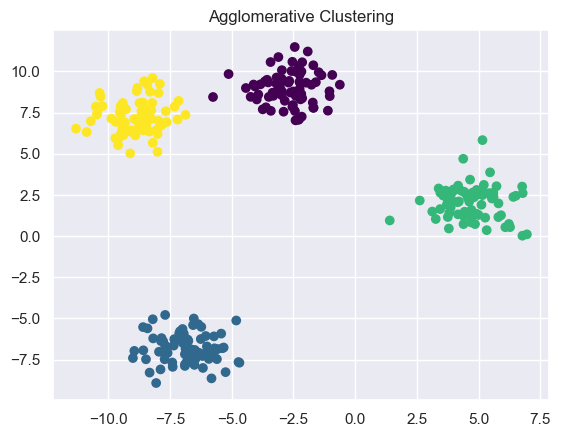

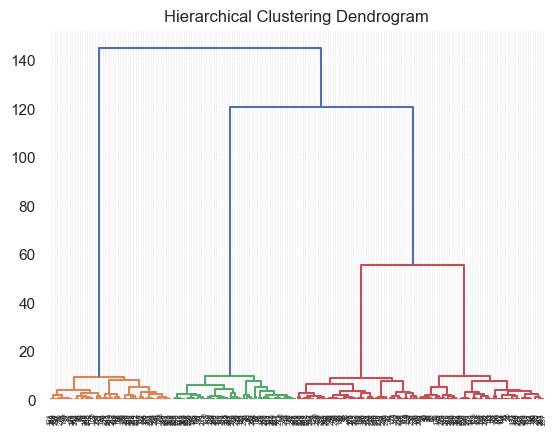

In [11]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# Generating synthetic data
X, _ = make_blobs(n_samples=300, centers=4, random_state=42)

# Applying Agglomerative Clustering
agg_clustering = AgglomerativeClustering(n_clusters=4)
agg_labels = agg_clustering.fit_predict(X)

# Visualizing the results
plt.scatter(X[:, 0], X[:, 1], c=agg_labels, cmap='viridis')
plt.title('Agglomerative Clustering')
plt.show()

# Dendrogram for hierarchical structure
linkage_matrix = linkage(X, 'ward')
dendrogram(linkage_matrix)
plt.title('Hierarchical Clustering Dendrogram')
plt.show()


## DBSCAN (Density-Based Spatial Clustering of Applications with Noise):

Based on:
DBSCAN is based on density. It groups together data points that are close to each other and marks data points in less dense regions as outliers.

How it works:

    Define a neighborhood around each data point.
    Form clusters by connecting data points with sufficiently dense neighborhoods.
    Identify outliers as data points in less dense regions.

Requirements:

    Parameters: radius (epsilon) and minimum points.

Differences:

    Can discover clusters of arbitrary shapes.
    Identifies outliers as noise.

When to use:

    Unevenly distributed clusters.
    Clusters of arbitrary shapes.
    Presence of noise or outliers.


    Epsilon (ε):
        Definition: Epsilon defines the radius around a data point within which the algorithm searches for other data points to form a cluster.
        Role: It determines the neighborhood of a data point. If the distance between two points is less than or equal to ε, they are considered neighbors.
        Impact: A smaller ε leads to tighter, more dense clusters, while a larger ε may merge multiple clusters into a single one.

    Min Points:
        Definition: Min Points is the minimum number of data points required to form a dense region (core point) that initiates the creation of a cluster.
        Role: It influences the minimum size of a cluster. A cluster must have at least Min Points to be considered valid.
        Impact: A smaller Min Points allows smaller clusters to form, while a larger Min Points requires more data points for a region to be considered a cluster.

How They Interact:

    A data point is considered a Core Point if there are at least Min Points within its ε-neighborhood.
    A data point is considered a Border Point if it has fewer neighbors than Min Points but is within the ε-neighborhood of a Core Point.
    A Cluster is formed by connecting Core Points and their reachable neighbors within the ε-neighborhood.
    Data points that are not Core or Border Points are considered Noise.

Choosing Parameters:

    Selecting appropriate ε and Min Points depends on the characteristics of the data.
    It may require experimentation and domain knowledge.
    Visualization tools (such as plotting a k-distance graph) can help in selecting suitable parameters.

AttributeError: 'list' object has no attribute 'reshape'

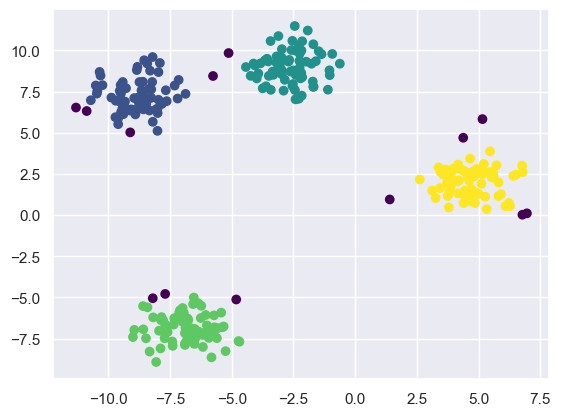

In [32]:
from sklearn.cluster import DBSCAN

epsilon=0.95
min_points=8
dbscan = DBSCAN(eps=epsilon, min_samples=min_points)
dbscan_labels = dbscan.fit_predict(X)
dbscan_labels
# Visualizing the results
plt.scatter(X[:, 0], X[:, 1], c=dbscan_labels, cmap='viridis')


dir(dbscan)
# dbscan.fit_predict([-2,2].reshape(-1,1))
# dbscan


Plan: 
- data exploration 
- preprocessing
    - data typing
    - Scaling
    - Drop columns if needed 
    - smth else
    - --> create python pipeline for running it fast
- Dimension reductions + clustering  - different methods
    - PCA ? MCA? Check something else
    - unsupervised methods such as KNN, etc.
- trying to create characteristic labeles
- visualize on map! Would be super interesting
- bring time series data --> how can we forecast changes in labels?
- API? --> check the readme.